## Loading the required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Loading the dataset

In [2]:
sheet_id = '1TWNez8kF5LpTc0QF1UuYrdmLXxJhGV2mVTpjGU7Sbt0'
sheet_name = 'House_Rent_Prediction.csv'
url = f"https://docs.google.com/spreadsheets/d/{sheet_id}/gviz/tq?tqx=out:csv&sheet={sheet_name}"
df = pd.read_csv(url)

print('Shape of the dataset',df.shape)
df.head()

Shape of the dataset (20555, 25)


,id,type,locality,activation_date,latitude,longitude,lease_type,gym,lift,swimming_pool,...,bathroom,facing,cup_board,floor,total_floor,amenities,water_supply,building_type,balconies,rent
0,ff8081815733a243015733b2876600a6,BHK2,NaN,21-04-2018 14:44,12.934471,77.634471,FAMILY,1,1,1,...,2.0,E,2.0,6.0,12.0,"{""LIFT"":true,""GYM"":true,""INTERNET"":true,""AC"":f...",CORP_BORE,AP,2.0,40000.0
1,ff8081815ee25e15015ee50004da2acd,BHK2,Bellandur,9/10/2017 12:48,12.929557,77.672280,ANYONE,0,1,0,...,2.0,NE,2.0,3.0,4.0,"{""LIFT"":true,""GYM"":false,""INTERNET"":false,""AC""...",CORPORATION,AP,2.0,22000.0
2,ff80818163f29c9e0163f46770b873e7,BHK3,Thiruvanmiyur,12/6/2018 22:02,12.982870,80.262012,FAMILY,0,1,0,...,3.0,E,3.0,1.0,5.0,"{""LIFT"":true,""GYM"":false,""INTERNET"":false,""AC""...",CORP_BORE,AP,3.0,28000.0
3,ff80818164b68a700164b74b1b247a1d,BHK1,Attiguppe,20-07-2018 16:22,12.955991,77.531634,FAMILY,0,0,0,...,1.0,E,1.0,1.0,2.0,"{""LIFT"":false,""GYM"":false,""INTERNET"":false,""AC...",CORPORATION,IH,0.0,8000.0
4,ff80818163b1faf00163b4b9b8a163b1,BHK3,Kodihalli,31-05-2018 17:41,12.963903,77.649446,FAMILY,0,0,0,...,3.0,E,4.0,0.0,0.0,"{""LIFT"":false,""GYM"":false,""INTERNET"":false,""AC...",CORPORATION,IH,1.0,45000.0


## Dropping duplicate rows

In [3]:
a=len(df)
print('Original dataframe length',a)
df.drop_duplicates(inplace=True)
b=len(df)
print('Dataframe length after dropping duplicate rows',b)
print('No of duplicate rows removed',a-b)

Original dataframe length 20555
Dataframe length after dropping duplicate rows 20523
No of duplicate rows removed 32


## Checking for 'null_count','unique_values','percent_of_null_values' in the dataset

In [4]:
pd.DataFrame({'dtypes':df.dtypes,'null_count':df.isnull().sum(),'unique_values':df.nunique(),
             'percent_of_null_values':df.isnull().mean()*100})

,dtypes,null_count,unique_values,percent_of_null_values
id,object,0,20523,0.000000
type,object,15,9,0.073089
locality,object,160,1917,0.779613
activation_date,object,23,19566,0.112069
latitude,float64,23,17733,0.112069
longitude,float64,23,17726,0.112069
lease_type,object,23,4,0.112069
gym,int64,0,2,0.000000
lift,int64,0,2,0.000000
swimming_pool,int64,0,2,0.000000


- We have less than 1% of null values in all columns, so I'll just drop the rows with missing values

In [5]:
# Dropping null rows

df.dropna(inplace=True)
print('shape before removing null_values:',b,'\n','shape after removing null_values:',df.shape)

shape before removing null_values: 20523 
 shape after removing null_values: (20357, 25)


### Segregating categorical and numerical columns

In [6]:
cc=[]
nc=[]
for i in df.columns:
    if df[i].dtype=='O':
        cc.append(i)
    else:
        nc.append(i)
print('categorical_columns:',cc)
print()
print('numerical_columns:',nc)

categorical_columns: ['id', 'type', 'locality', 'activation_date', 'lease_type', 'furnishing', 'parking', 'facing', 'amenities', 'water_supply', 'building_type']

numerical_columns: ['latitude', 'longitude', 'gym', 'lift', 'swimming_pool', 'negotiable', 'property_size', 'property_age', 'bathroom', 'cup_board', 'floor', 'total_floor', 'balconies', 'rent']


#### Feature engineering for the 'amenities' column

In [7]:
import json

a=0
l=[]
c=[]
for j in list(df['amenities']):
    res = json.loads(j)
    s=len((list(res.keys())))
    l.append(s)
    if s>a:
        a=s
        c.append(list(res.keys()))
print(set(l))
print(a)
print(c[-1])

{18, 19, 12}
19
['LIFT', 'GYM', 'INTERNET', 'AC', 'CLUB', 'INTERCOM', 'POOL', 'CPA', 'FS', 'SERVANT', 'SECURITY', 'SC', 'GP', 'PARK', 'RWH', 'STP', 'HK', 'PB', 'VP']


*The data in 'amenities' column is in **json** format*

In [8]:
q=[]
w=[]

for j in list(df['amenities']):
    res = json.loads(j)
    d=list(res.keys())
#     e=list(res.values())
    g=[]
    for k in c[-1]:
        if k in d:
            f=res[k]
            if f==True:
                g.append(1)
            elif f==False:
                g.append(0)
        elif k not in d:
            g.append(-1)
        
        
    q.append(g)
    

# Creating a new 'amenities' dataframe

df1=pd.DataFrame(q,columns=c[-1])
df1['id']=list(df['id'])

- *Basically what I have done here is that I've changed each json data in the 'amenities' column to dictionary format and extracted the values from each dictionary and stored as '1' if it is 'True' and '0' if it is 'False' in the list named as 'q'*
- *Next I have created a new dataframe(df1) with the newly engineered 'amenities' column which I will concatenate with the original dataframe*


In [9]:
# Creating a copy of the original dataset

original_df=df.copy()

#### Engineeering the 'locality' column

In [10]:
l=[i.split()[0] for i in list(original_df['locality'])]
df['locality']=l
# df['locality'].isnull().sum()
df['locality'].isnull().sum()

0

### Creating a new column in the dataframe named 'rent_level'

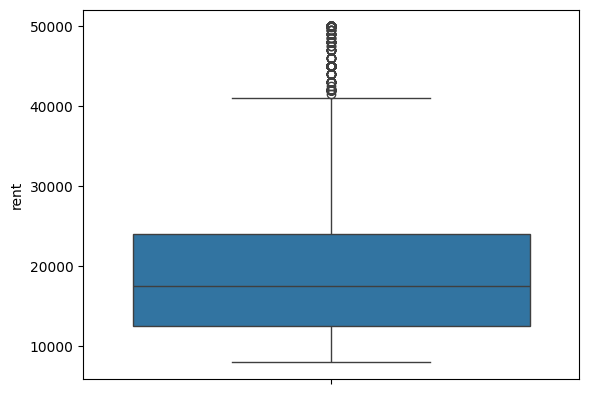

In [11]:
sns.boxplot(y = 'rent', data = df)
plt.show()

In [12]:
df['rent'].describe()

count    20357.000000
mean     19049.434838
std       8433.565460
min       8000.000000
25%      12500.000000
50%      17500.000000
75%      24000.000000
max      50000.000000
Name: rent, dtype: float64

In [13]:
t=[]
for i in list(df['rent']):
    if i<=12500:
        t.append('low_rent')
    elif i>12500 and i<=17500:
        t.append('medium_rent')
    elif i>17500 and i<=24000:
        t.append('high_rent')
    else:
        t.append('costly_rent')
df['rent_level']=t
len(t)

20357

In [14]:
# Dropping the original 'amenities' column from the dataframe
df.drop(df.columns[20], axis=1, inplace=True)

#Conatenating the original and newly created 'amenities' dataframe
df2 = pd.merge(df, df1, on='id', how='outer')

df2.shape

(20357, 44)

### Checking for outliers and replacing them with upper and lower limit values respectively

In [15]:
def plots(df, variable):
    # function takes a dataframe (df) and
    # the variable of interest as arguments

    # define figure size
    plt.figure(figsize=(16, 4))

    # histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[variable], bins=30)
    plt.title('Histogram')

   # boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')
    plt.show()

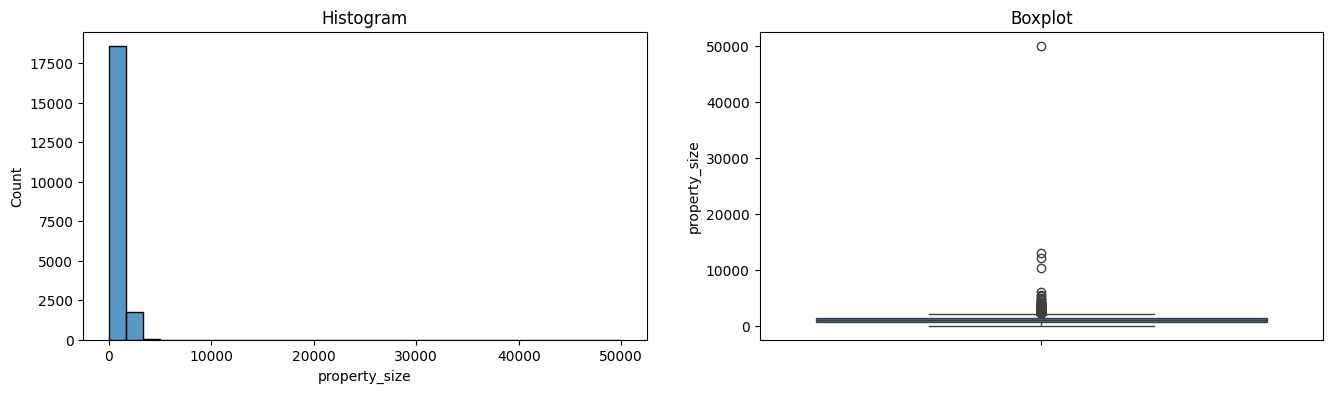

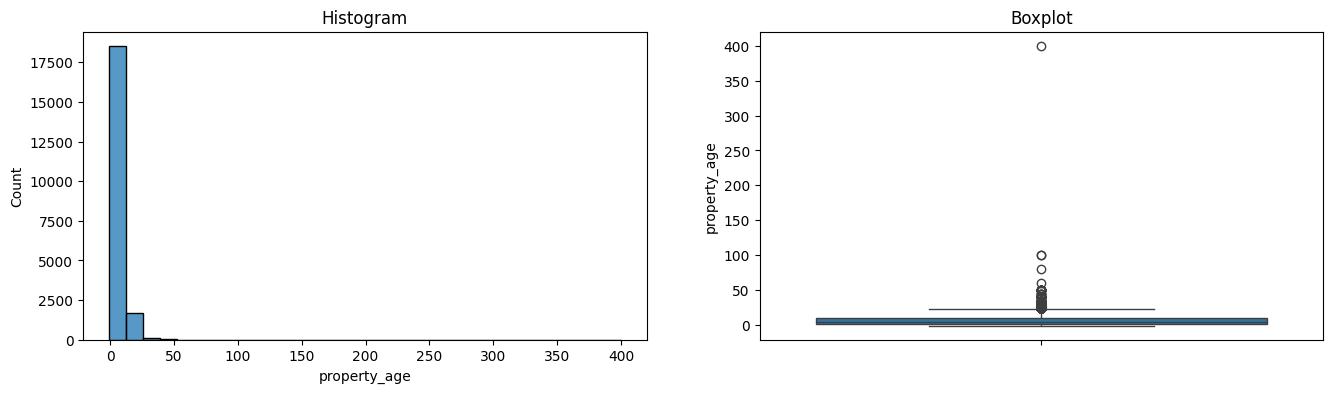

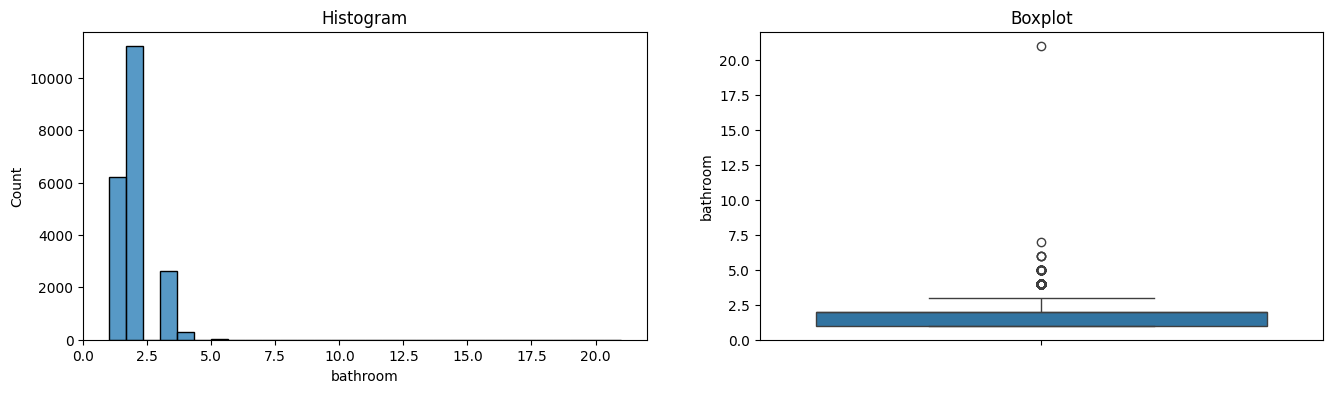

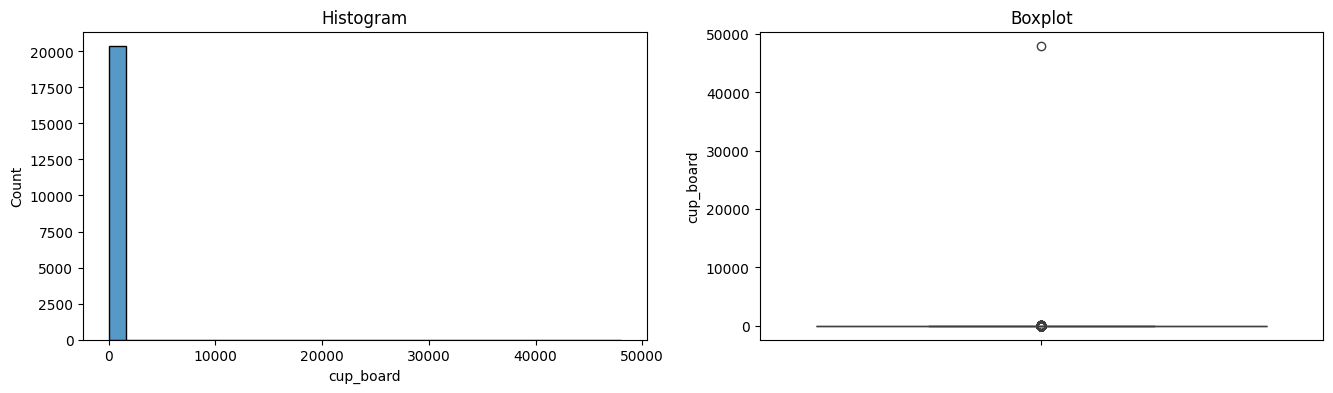

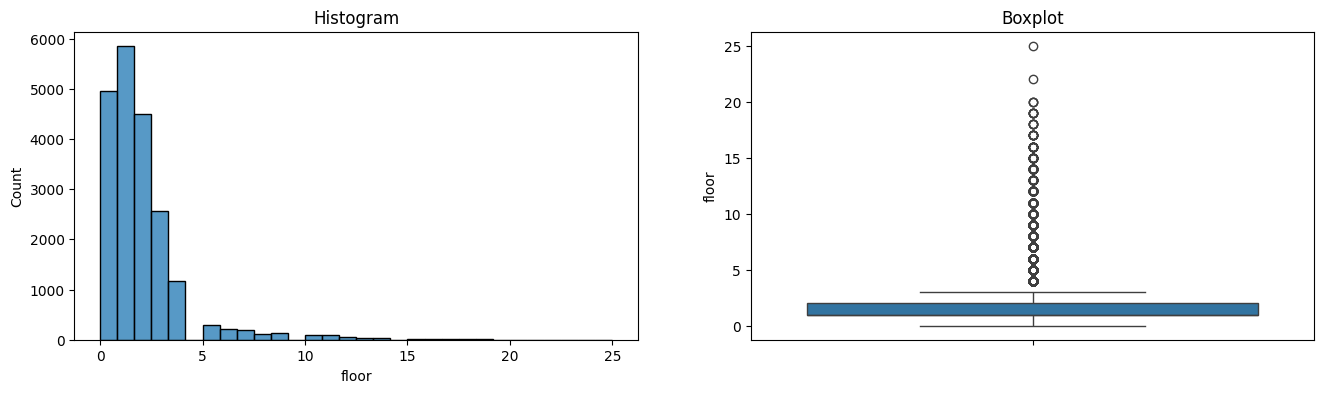

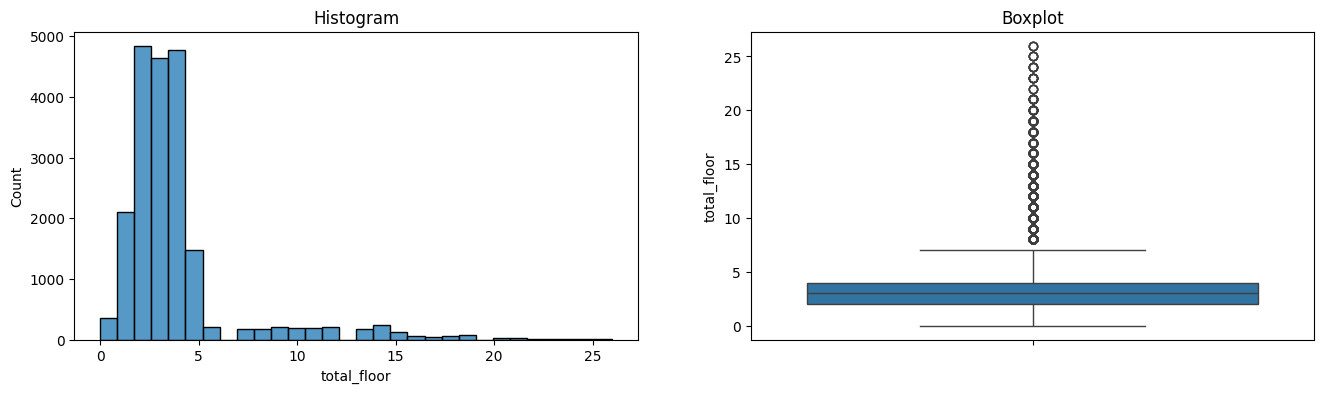

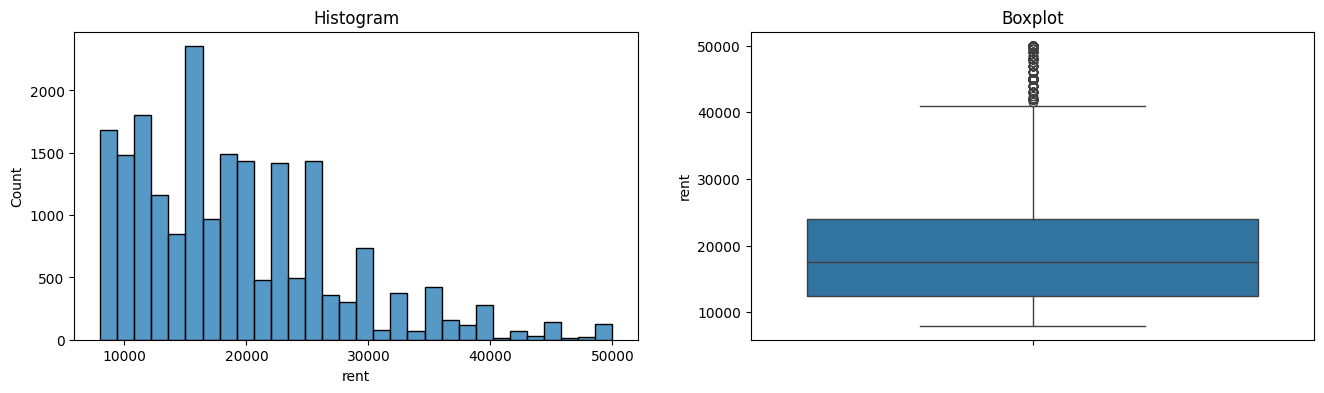

In [16]:
for m in ['property_size', 
          'property_age', 'bathroom', 'cup_board', 'floor', 'total_floor', 'rent']:
    plots(df2, m)

In [17]:
def find_skewed_boundaries(df, variable, distance):

    # Calculating the boundaries outside which sit the outliers
    # for skewed distributions


    IQR = round(df[variable].quantile(0.75) - df[variable].quantile(0.25))

    lower_boundary = abs(round(df[variable].quantile(0.25) - (IQR * distance)))
    upper_boundary = abs(round(df[variable].quantile(0.75) + (IQR * distance)))

    return upper_boundary, lower_boundary

In [18]:
ul=[]
for v in ['property_size', 
          'property_age', 'bathroom', 'cup_board', 'floor', 'total_floor',  'rent']:
    upper_limit, lower_limit = find_skewed_boundaries(df2, v, 1.5)
    ul.append((v,upper_limit, lower_limit))

In [19]:
def replace_outlier(dataset,variable,upper_limit,lower_limit):
    dataset[variable]= np.where(dataset[variable] > upper_limit, upper_limit,
                       np.where(dataset[variable] < lower_limit, lower_limit, dataset[variable]))

In [20]:
for v1 in range(len(ul)):
    replace_outlier(df2,ul[v1][0],ul[v1][1],ul[v1][2])

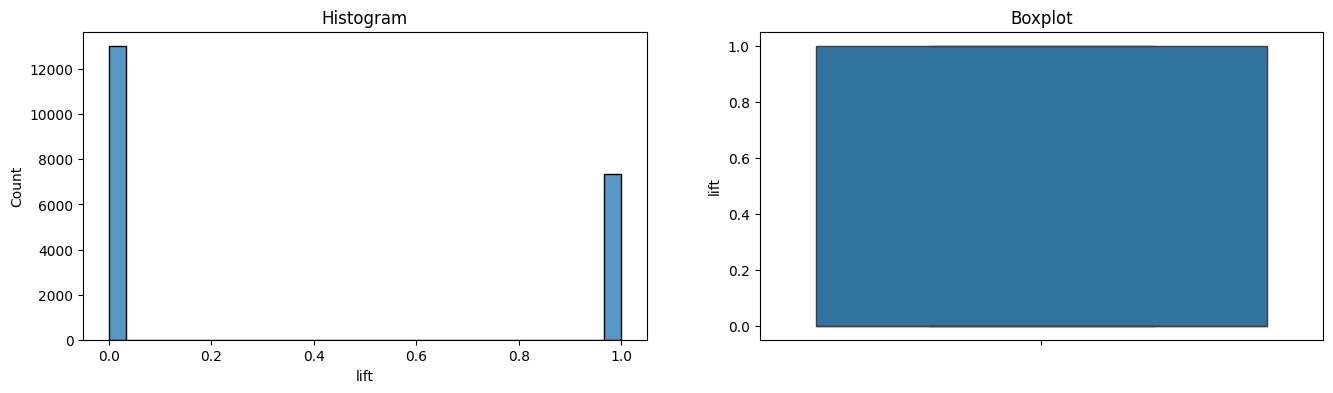

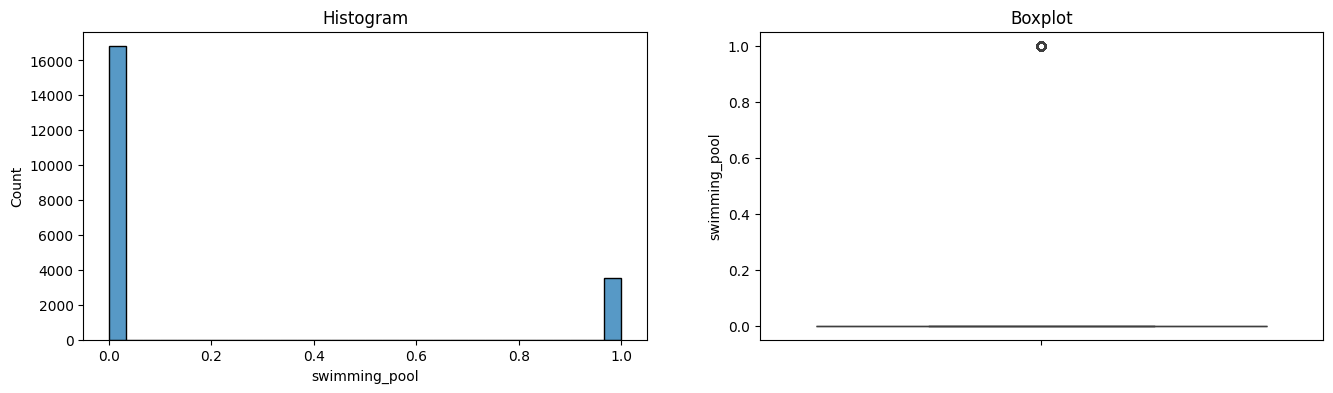

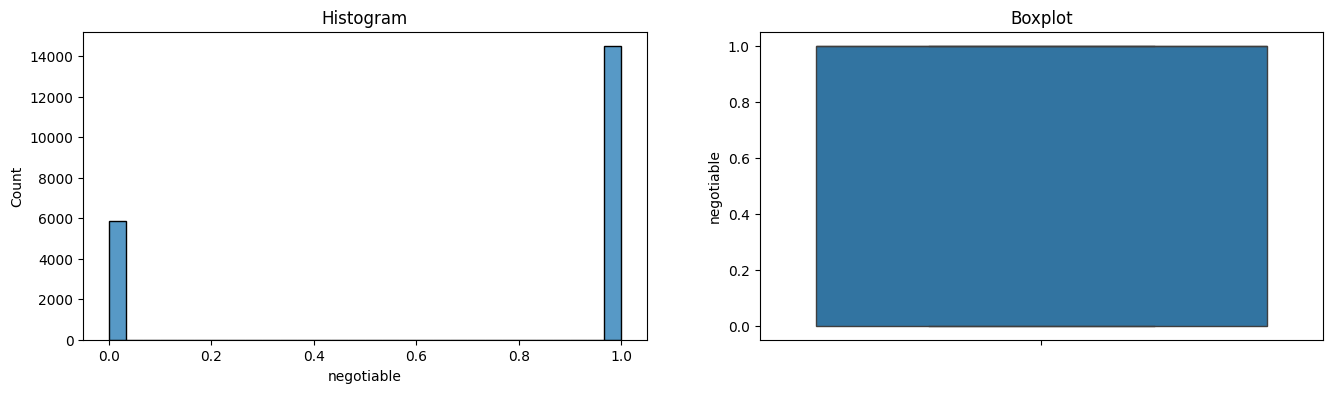

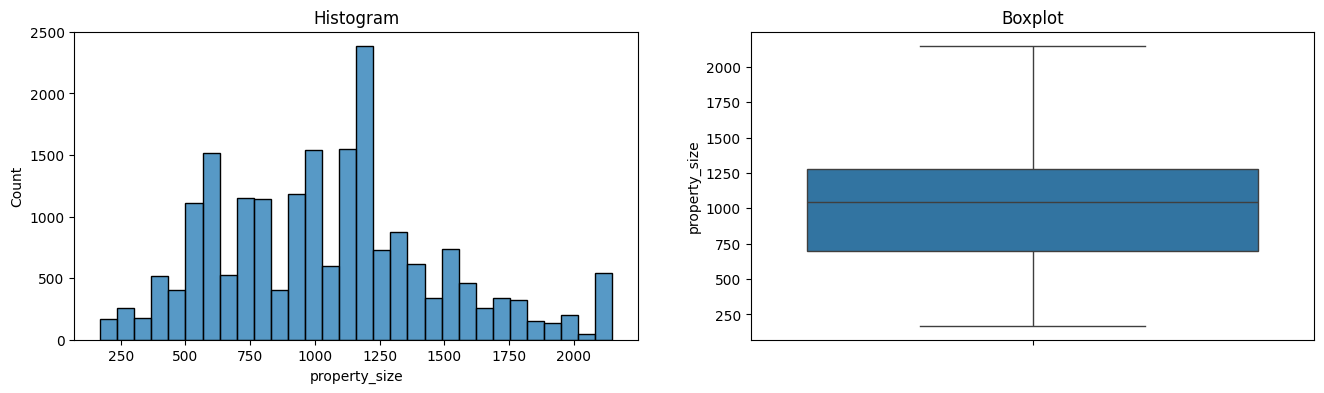

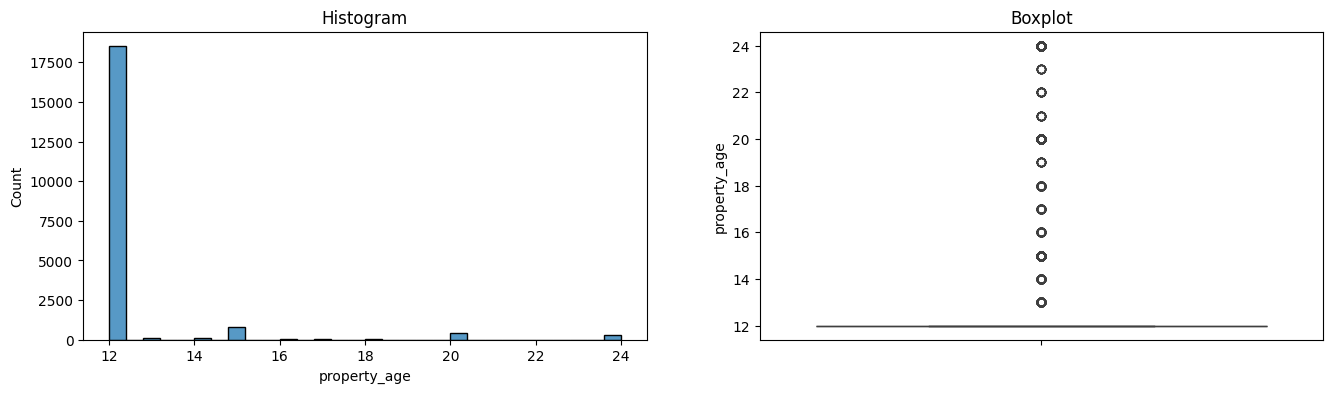

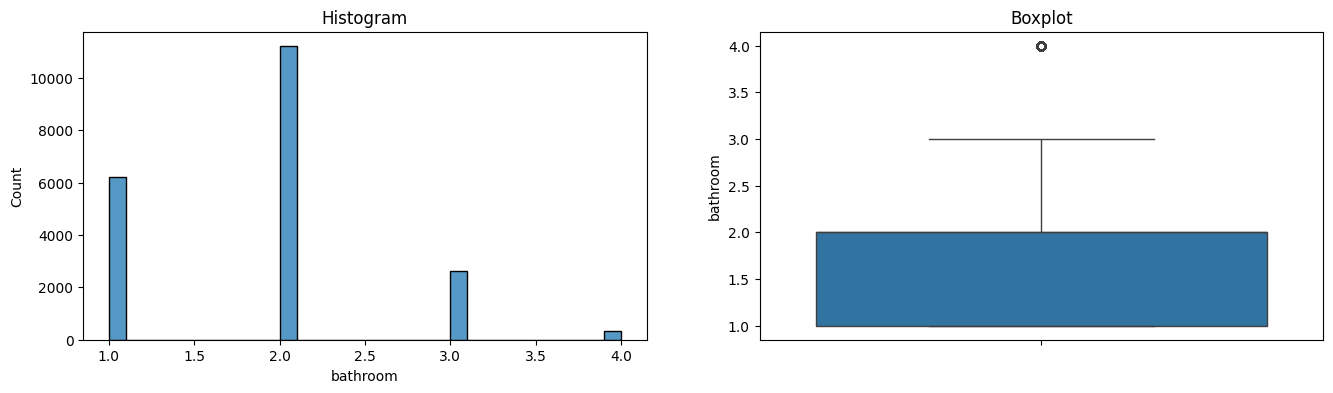

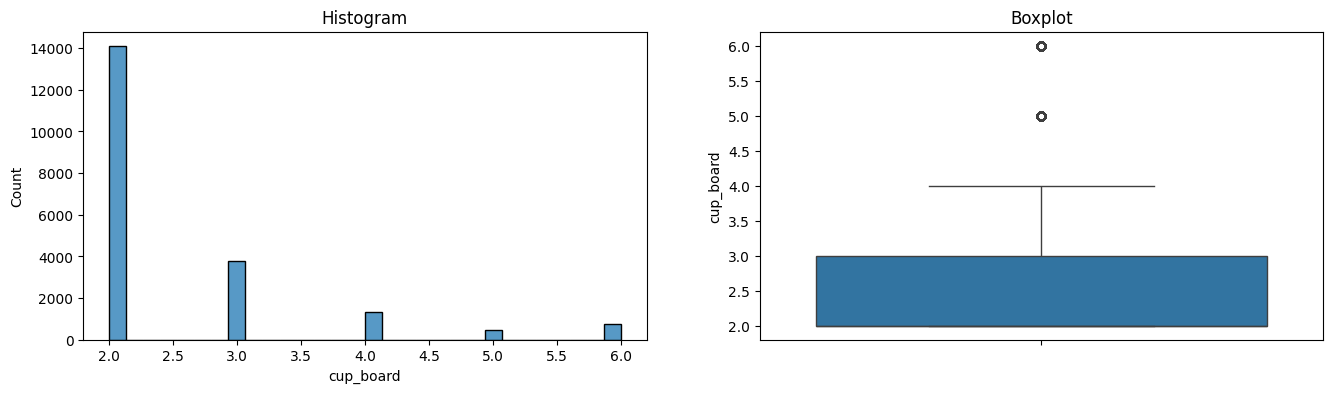

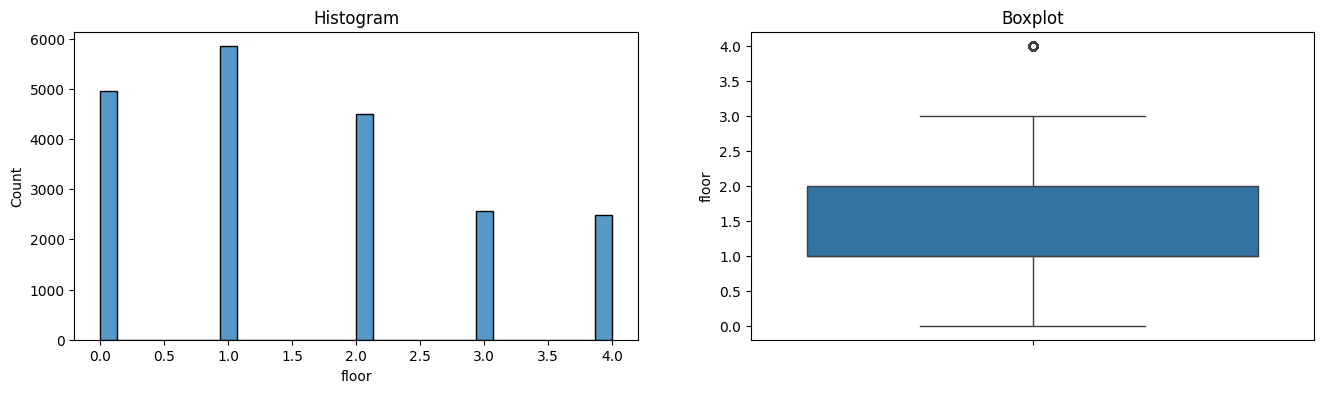

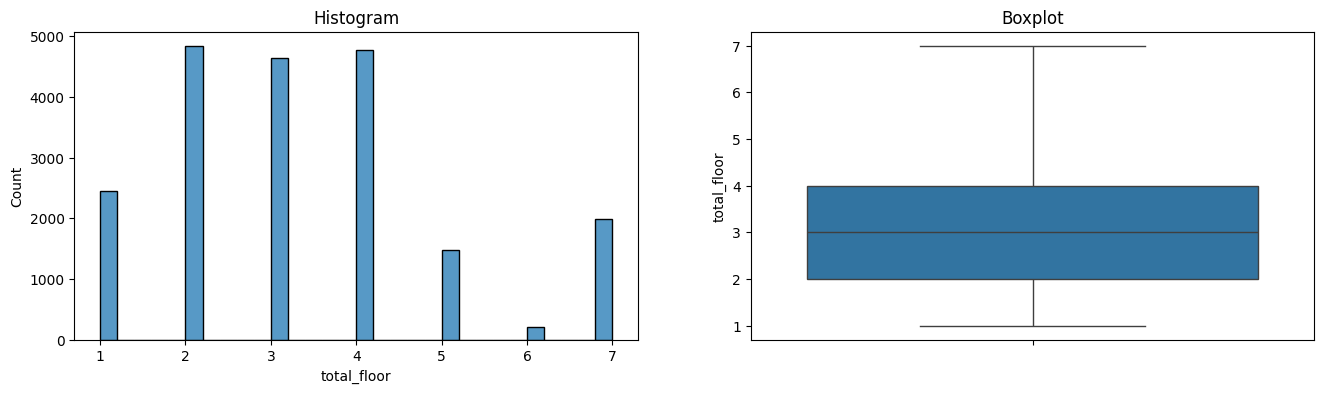

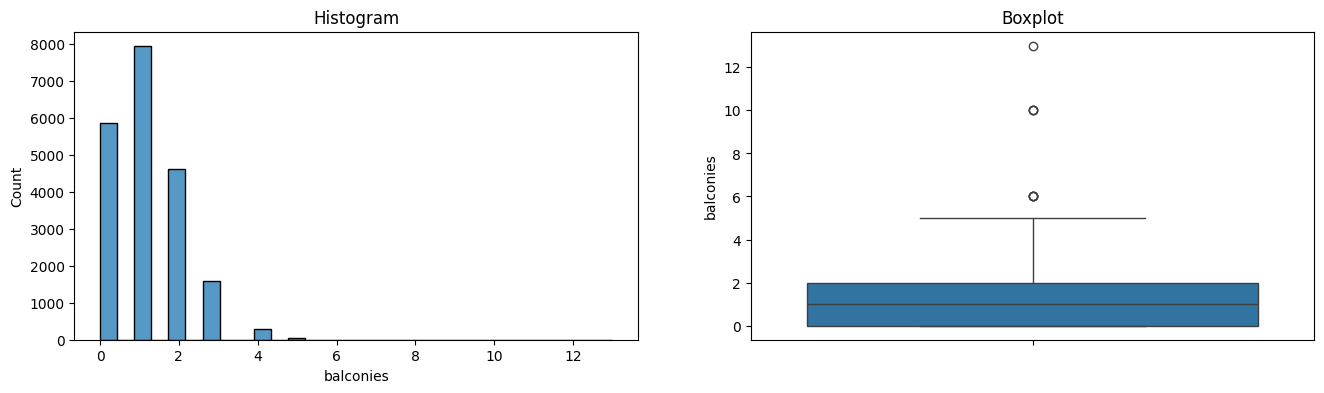

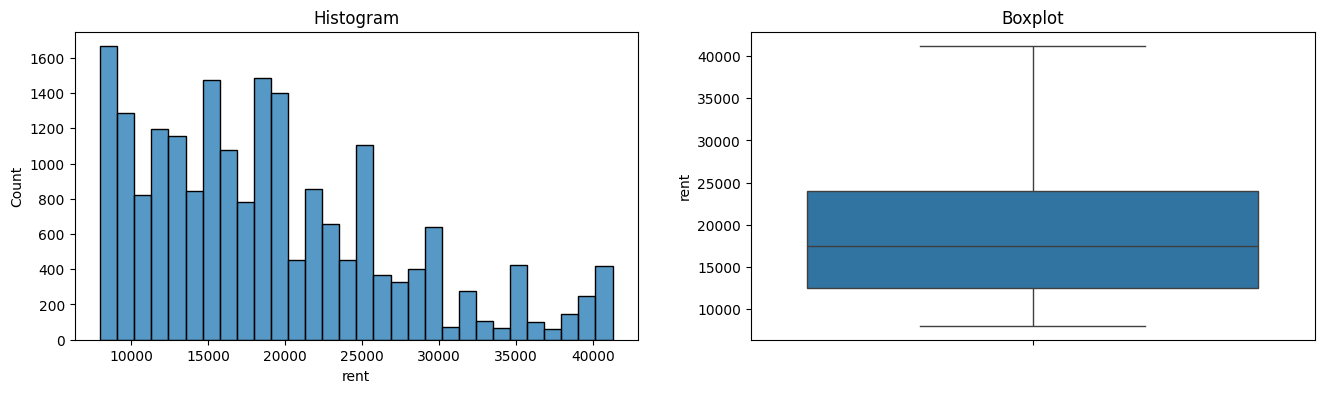

In [21]:
for m in nc[3:]:
    plots(df2, m)

In [22]:
df2.to_csv('rent_features.csv',encoding='utf-8')

### Transforming the distribution of the 'property_size' and 'rent' columns into 'normal distribution'

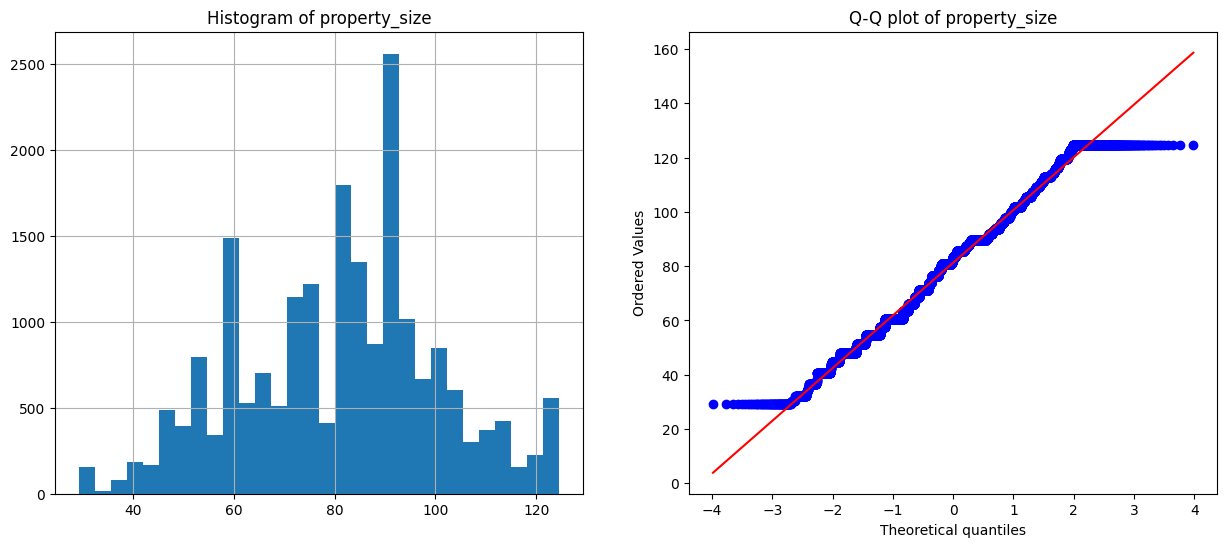

In [23]:
# for Q-Q plots
import scipy.stats as stats
from sklearn.preprocessing import FunctionTransformer

def diagnostic_plots(df, variable):

    # function to plot a histogram and a Q-Q plot
    # side by side, for a certain variable

    plt.figure(figsize=(15, 6))

    # histogram
    plt.subplot(1, 2, 1)
    df[variable].hist(bins=30)
    plt.title(f"Histogram of {variable}")

    # q-q plot
    plt.subplot(1, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.title(f"Q-Q plot of {variable}")

    plt.show()

# with open-source packages
from sklearn.preprocessing import PowerTransformer

# initialize the transformer with box-cox
transformer1 = PowerTransformer(method="box-cox", standardize=False)
transformer1.fit(df2[['rent']])
# transformer1.set_output(transform="pandas")
df2['rent']= transformer1.transform(df2[['rent']])

# diagnostic_plots(df2, 'rent')

transformer2 = PowerTransformer(method="yeo-johnson", standardize=False)
transformer2.fit(df2[['property_size']])
# transformer2.set_output(transform="pandas")
df2['property_size']= transformer2.transform(df2[['property_size']])

diagnostic_plots(df2, 'property_size')



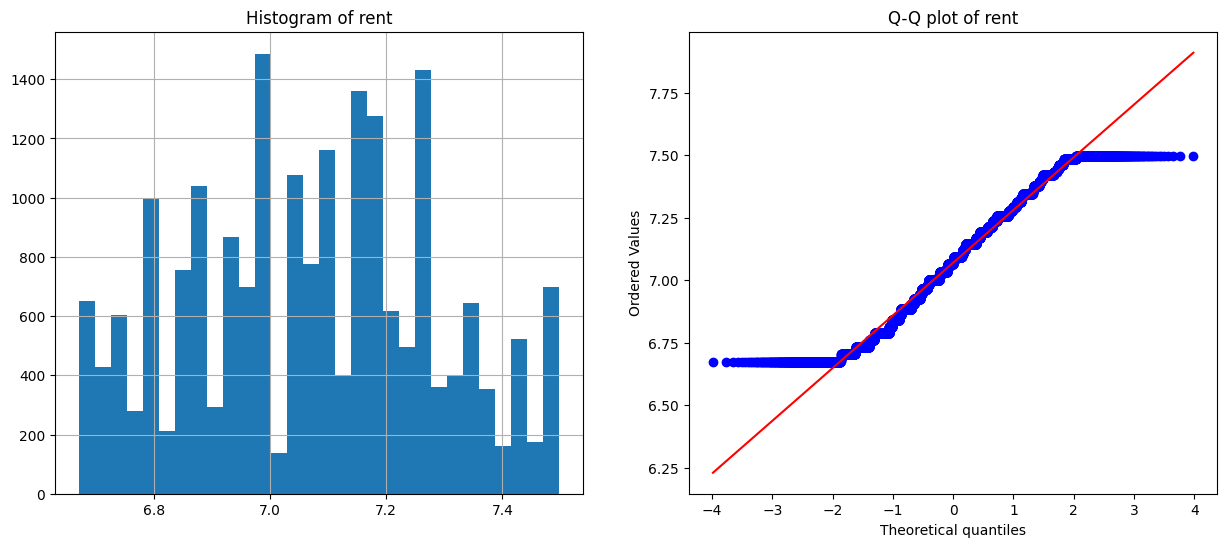

In [24]:
diagnostic_plots(df2, 'rent')

## Building the ML model

In [27]:
from sklearn.model_selection import train_test_split

# for encoding with feature-engine
from feature_engine.encoding import MeanEncoder

### Using only the selected features through SHAP Analysis 

In [28]:
X=df2[['type', 'locality', 'gym', 'swimming_pool', 'negotiable',
        'parking', 'property_size', 'property_age', 'bathroom',
        'cup_board', 'floor', 'total_floor',  'INTERNET', 'AC', 'CLUB',
        'CPA', 'SECURITY', 'GP', 'PARK','RWH', 'STP','rent_level']]

y=df2['rent']


X_train, X_test, y_train, y_test = train_test_split(
    X,  # predictors
    y,  # target
    test_size=0.20,  # percentage of obs in test set
    random_state=0,
)  # seed to ensure reproducibility

X_train.shape, X_test.shape

((16285, 22), (4072, 22))

### Mean encoding the categorical variables

In [29]:
mean_enc = MeanEncoder(
    # NOTE that we indicate ordered in the encoding_method, otherwise it assings numbers arbitrarily
#     encoding_method="ordered",
    variables=['type', 'locality','parking','rent_level']
)

In [30]:
mean_enc.fit(X_train, y_train)

MeanEncoder(variables=['type', 'locality', 'parking', 'rent_level'])

In [31]:
X_train = mean_enc.transform(X_train)
X_test = mean_enc.transform(X_test)

# let's explore the result
X_train.head()

C:\Users\DELL\anaconda3\envs\rent_price_ml\lib\site-packages\feature_engine\encoding\base_encoder.py:255: UserWarning: During the encoding, NaN values were introduced in the feature(s) locality.
  warnings.warn(


,type,locality,gym,swimming_pool,negotiable,parking,property_size,property_age,bathroom,cup_board,...,INTERNET,AC,CLUB,CPA,SECURITY,GP,PARK,RWH,STP,rent_level
12953,6.840400,7.008590,0,0,1,6.950671,51.413149,12.0,1.0,2.0,...,1,0,0,0,0,0,1,0,0,6.793599
10252,7.068998,7.069460,0,0,1,6.924247,48.061608,12.0,1.0,2.0,...,1,0,0,0,0,1,0,0,0,6.793599
7193,7.274389,7.067097,0,0,0,7.169811,112.730359,12.0,2.0,2.0,...,1,0,-1,-1,0,-1,0,-1,-1,7.156663
1223,7.068998,7.069460,0,0,1,7.169811,76.255923,13.0,2.0,2.0,...,0,0,0,0,1,0,0,0,0,7.000412
5538,7.274389,7.381402,1,1,0,7.169811,107.347425,12.0,3.0,3.0,...,1,0,0,0,1,1,0,0,0,7.350097


In [32]:
# Im creating a new column in the X_test called 'rent' which contains all values from y_test
X_test['rent']=y_test
X_test.dropna(inplace=True)

y_test=X_test['rent']
X_test=X_test[['type', 'locality', 'gym', 'swimming_pool', 'negotiable',
        'parking', 'property_size', 'property_age', 'bathroom',
        'cup_board', 'floor', 'total_floor',  'INTERNET', 'AC', 'CLUB',
        'CPA', 'SECURITY', 'GP', 'PARK','RWH', 'STP','rent_level']]


In [35]:
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score,mean_squared_error


In [36]:
df3=pd.concat([X_train, X_test])
df4=list(pd.concat([y_train, y_test]))
df3['rent']=df4

In [37]:
X=df3.iloc[:,:-1].values
y=df3.iloc[:,-1].values


In [38]:
hr=HistGradientBoostingRegressor(learning_rate=0.05,max_leaf_nodes=300,max_depth=200,
                                               max_iter=1000,
                                               random_state=2023)
# Train the model.
scaler = StandardScaler()
X=scaler.fit_transform(X)
hr.fit(X, y)

# Make predictions on the train set and calculate
# the mean squared error.

pred = hr.predict(X)
print('HistGradientBoostingRegressor rmse: {}'.format(np.sqrt(mean_squared_error(y, pred))))
print('HistGradientBoostingRegressor r2-score: {}'.format(r2_score(y, pred)))


HistGradientBoostingRegressor rmse: 0.04350161324245586
HistGradientBoostingRegressor r2-score: 0.9582399755996092


In [39]:
pred_o=transformer1.inverse_transform(pred.reshape(-1, 1))
y_o= transformer1.inverse_transform(y.reshape(-1, 1))

x=pd.DataFrame({'rv':list(y_o),'pv':list(pred_o)})
x['error']=(((x['rv']-x['pv']))/(x['rv']))
(x.head())



C:\Users\DELL\anaconda3\envs\rent_price_ml\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but PowerTransformer was fitted with feature names
  warnings.warn(
C:\Users\DELL\anaconda3\envs\rent_price_ml\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but PowerTransformer was fitted with feature names
  warnings.warn(


,rv,pv,error
0,[10999.99999999998],[10292.47705473463],[0.06432026775139552]
1,[12000.000000000018],[11118.841633551741],[0.07342986387068963]
2,[20000.00000000003],[20402.34580260489],[-0.020117290130243024]
3,[16499.999999999985],[15470.377211055309],[0.06240138114816226]
4,[41250.000000000065],[36951.60129206444],[0.10420360504086341]


In [40]:
round(list(x['error'].max())[0],2),round(list(x['error'].min())[0],2)

(0.35, -0.55)

### Saving the model

In [41]:
import pickle

In [42]:
data={'transformer1_rent':transformer1,
      'transformer2_prop_size':transformer2,
      'mean_enc':mean_enc,'scaler':scaler,'model':hr}

In [43]:
with open('houserent_saved_steps_regressor.pkl','wb') as file:
    pickle.dump(data,file)

### Reloading the model from the pickle file and making predictions 

In [44]:
with open('houserent_saved_steps_regressor.pkl','rb') as file:
    data=pickle.load(file)

In [45]:
rent_box_cox_transform=data['transformer1_rent']
prop_size_yeo_johnson_transform=data['transformer2_prop_size']
mean_enc=data['mean_enc']
scaler=data['scaler']
regressor_loaded=data['model']

In [46]:
B=scaler.fit_transform(X)
regressor_loaded.fit(X,y)
y_pred=regressor_loaded.predict(B)
t=rent_box_cox_transform.inverse_transform(y_pred.reshape(-1,1))
t1=rent_box_cox_transform.inverse_transform(y.reshape(-1, 1))


C:\Users\DELL\anaconda3\envs\rent_price_ml\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but PowerTransformer was fitted with feature names
  warnings.warn(
C:\Users\DELL\anaconda3\envs\rent_price_ml\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but PowerTransformer was fitted with feature names
  warnings.warn(


In [47]:
f=pd.DataFrame({'true_rent':list(t1),'pred_rent':list(t)})
f['error']=((f['true_rent']-f['pred_rent'])/(f['true_rent']))
round(list(f['error'].max())[0],2),round(list(f['error'].min())[0],2)

(0.34, -0.55)